## Hausaufgabe 7

#### **Abgabe** <br> 08.07. 12:00 Uhr (via studIP) 
#### **Verteidigung** <br> 11.07. 08:00-11:00 Uhr 

Mit jedem Blatt können **maximal** 5 Prozentpunkte Bonus für die Klausur erreicht werden, falls:
1) mind. 60% des Arbeitsblattes korrekt bearbeitet wurden 
2) das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.

*Rahmenbedingungen*:
- Jede Gruppe muss sich bei studIP für einen Slot zur Verteidigung registrieren.
- Erfolgreiche Verteidigung bedeutet, dass ein von uns ausgewähltes Team-Mitglied die Lösung erklärt und Fragen dazu beantwortet.
- ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
- Der Code muss ohne Hilfsmittel erläutert werden.
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Jede Gruppe gibt nur eine Lösung als Zip-Datei ab, die mit dem Namen und der Matrikelnummer eines Mitglieds versehen ist. Also z.B. `mustermann_12345678.zip` 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from utils import color1, color2, custom_cmap

---

## Aufgabe 1 (45%): K-Nearest-Neighbours/Logistic-Regression

a) (5%) Laden Sie die Daten "samples.npy" und "labels.npy". Visualisieren Sie die Samples in einem Scatterplot mit den importierten Farben "color1" und "color2" für die verschiedenen Labels. 

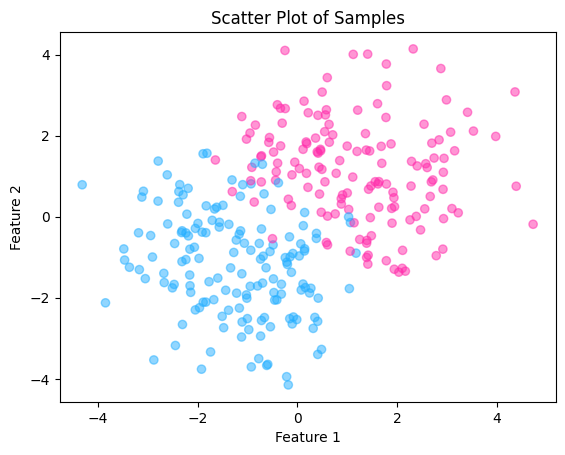

In [3]:
# Load the data
samples = np.load('samples.npy')
labels = np.load('labels.npy')

# Visualize the data
plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap=custom_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Samples')
plt.show()

b) (5%) Fitten Sie einen KNeighborsClassifier Algorithmus von sklearn mit k=2 und berechnen Sie die Classification Accuracy 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(samples, labels)

# Predict and compute accuracy
predictions = knn.predict(samples)
accuracy = accuracy_score(labels, predictions)

print(f'Classification Accuracy: {accuracy}')

Classification Accuracy: 0.9633333333333334


c) (15%) Plotten Sie in Ihre Figure von a) die gefitteten Klassifizierungs-Grenzen aus b). 

*Tipp: Erstellen Sie mit `np.meshgrid` ein Raster, von dem Sie dann jeden Punkt von Ihrem gefitteten KNeighborsClassifier klassifizieren lassen. Plotten Sie dann das Ergebnis mit plt.imshow. Als cmap können Sie die importierte "custom_cmap" nutzen.*

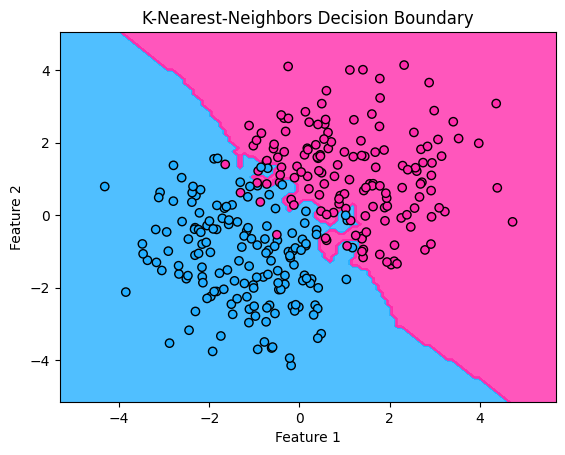

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Sample data
samples = np.load('samples.npy')
labels = np.load('labels.npy')

# Create color maps
color_map_light = ListedColormap([color1, color2])
color_map_bold = ListedColormap([color1, color2])

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(samples, labels)


# Plot decision boundary
x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using contourf
plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map_light)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, edgecolor='k', cmap=color_map_bold)
plt.title('K-Nearest-Neighbors Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


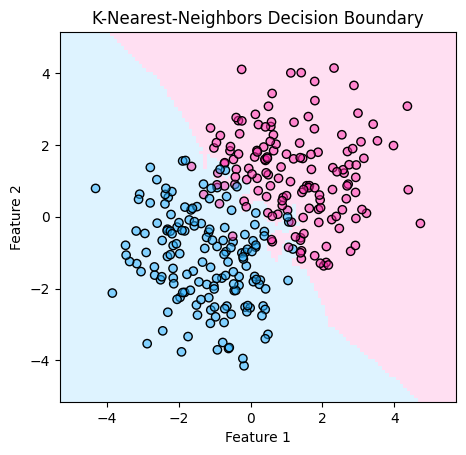

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Sample data
samples = np.load('samples.npy')
labels = np.load('labels.npy')

# Fit the model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(samples, labels)

# Plot decision boundary
x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', alpha=0.3, cmap=custom_cmap)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, edgecolor='k', cmap=custom_cmap)
plt.title('K-Nearest-Neighbors Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


d) (5%) Sie werden kleine Inseln in den Klassifizierungs-Grenzen erkennen. Was ist der kleinste Wert von k, mit dem die Inseln verschwinden? Für welchen Wert von k ist die Accuracy am besten?

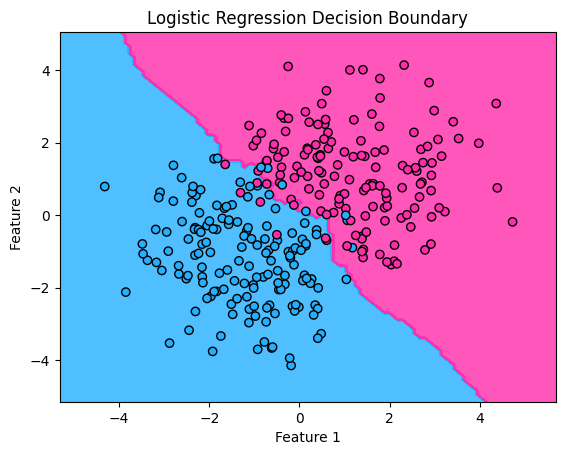

In [22]:
from sklearn.linear_model import LogisticRegression


# Fit the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(samples, labels)

# Plot decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map_light)
plt.scatter(samples[:, 0], samples[:, 1], c=labels, edgecolor='k', cmap=color_map_bold)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


e) (5%) Laden Sie die Testdaten "samples_test.npy" und "labels_test.npy" und berechnen Sie auch hierfür die Accuracy. Was fällt Ihnen auf?

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Laden der Testdaten
samples_test = np.load('samples_test.npy')
labels_test = np.load('labels_test.npy')

# Beispiel: Laden der Trainingsdaten (Annahme)
samples_train = np.load('samples.npy')
labels_train = np.load('labels.npy')

# Initialisierung und Anpassung des KNN-Modells
knn = KNeighborsClassifier(n_neighbors=5)  # Beispiel: k = 5
knn.fit(samples_train, labels_train)

# Vorhersagen auf den Testdaten
predictions = knn.predict(samples_test)

# Berechnung der Genauigkeit (Accuracy) auf den Testdaten
accuracy = accuracy_score(labels_test, predictions)

print(f'Accuracy on Test Data: {accuracy:.2f}')



Accuracy on Test Data: 0.94


Das die Accuracy von test und nicht test fast gleich ist.

f) (10%) Fitten Sie die Daten nun mit einer LogisticRegression von sklearn und erstellen Sie auch hier den Plot aus c), einmal mit den kontinuierlichen Klassifizierungs-"Grenzen" und einmal mit den harten Grenzen (Threshold bei 0.5). Vergleichen Sie die die Trainings- und Test-Accuracies. Wie unterscheiden sich die Ergebnisse von denen Ihres KNeighborsClassifier?

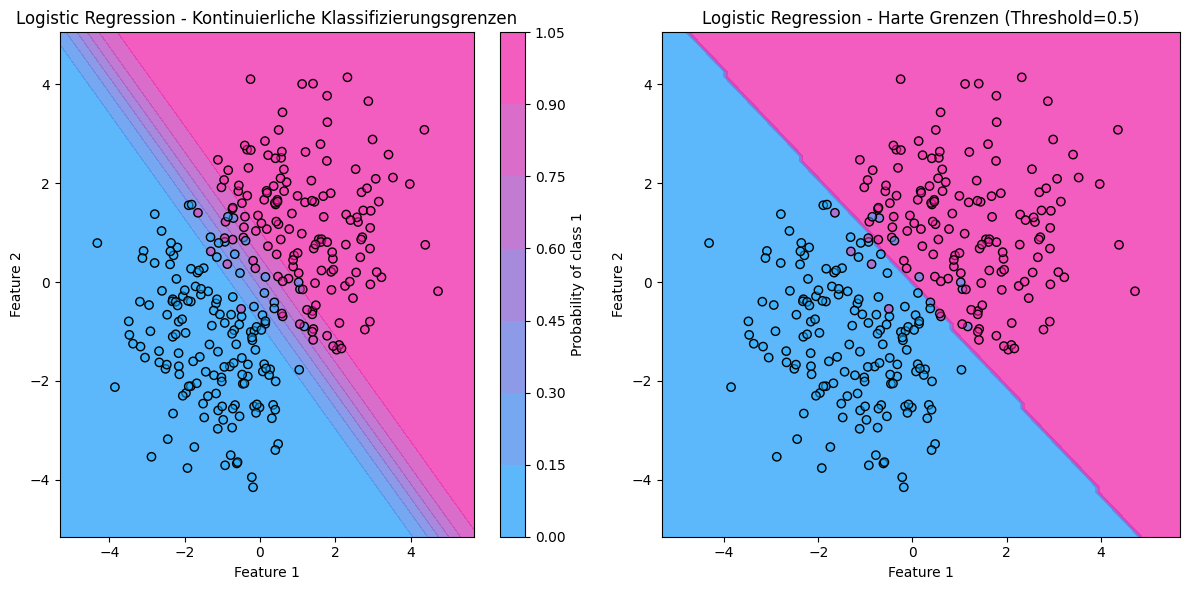

Trainings-Genauigkeit der Logistic Regression: 0.95
Test-Genauigkeit der Logistic Regression: 0.94


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Laden der Trainings- und Testdaten
samples_train = np.load('samples.npy')
labels_train = np.load('labels.npy')
samples_test = np.load('samples_test.npy')
labels_test = np.load('labels_test.npy')

# Fitting der Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(samples_train, labels_train)

# Bestimmen der Grenzen für den Plot
x_min, x_max = samples_train[:, 0].min() - 1, samples_train[:, 0].max() + 1
y_min, y_max = samples_train[:, 1].min() - 1, samples_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Kontinuierliche Klassifizierungsgrenzen plotten
Z_prob = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability of class 1
Z_prob = Z_prob.reshape(xx.shape)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_prob, alpha=0.8, cmap=custom_cmap)
plt.colorbar(label='Probability of class 1')
plt.scatter(samples_train[:, 0], samples_train[:, 1], c=labels_train, edgecolor='k', cmap=custom_cmap)
plt.title('Logistic Regression - Kontinuierliche Klassifizierungsgrenzen')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Harte Grenzen (Threshold bei 0.5) plotten
threshold = 0.5
Z_hard = (Z_prob >= threshold).astype(int)  # Apply hard threshold to probabilities
Z_hard = Z_hard.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_hard, alpha=0.8, cmap=custom_cmap)
plt.scatter(samples_train[:, 0], samples_train[:, 1], c=labels_train, edgecolor='k', cmap=custom_cmap)
plt.title(f'Logistic Regression - Harte Grenzen (Threshold={threshold})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Berechnung der Trainingsgenauigkeit
train_predictions = log_reg.predict(samples_train)
train_accuracy = accuracy_score(labels_train, train_predictions)

# Berechnung der Testgenauigkeit
test_predictions = log_reg.predict(samples_test)
test_accuracy = accuracy_score(labels_test, test_predictions)

print(f'Trainings-Genauigkeit der Logistic Regression: {train_accuracy:.2f}')
print(f'Test-Genauigkeit der Logistic Regression: {test_accuracy:.2f}')


---

## Aufgabe 2 (55%): Cross Validation

Nutzen Sie in dieser Aufgabe aus sklearn nur den KNeighborsClassifier. Sollten Sie bei einer Teilaufgabe nicht weiter kommen, können Sie auch weitere Funktionen aus sklearn nutzen, wie z.B. `train_test_split` oder `cross_val_score`. Dann aber selbstverständlich ohne die Punkte aus der jeweiligen Teilaufgabe zu erhalten.

a) (10%) Laden Sie die Daten "ex2_samples.npy" und "ex2_labels.npy" und visualisieren Sie sie wie in Aufgabe 1. Sie werden sehen, dass die Daten nicht mit einem linearen Classifier klassifizierbar sind. Schreiben Sie eine Funktion, die die Daten in ein anderes Koordinatensystem transformiert, in dem sie leichter zu klassifizieren sind. 

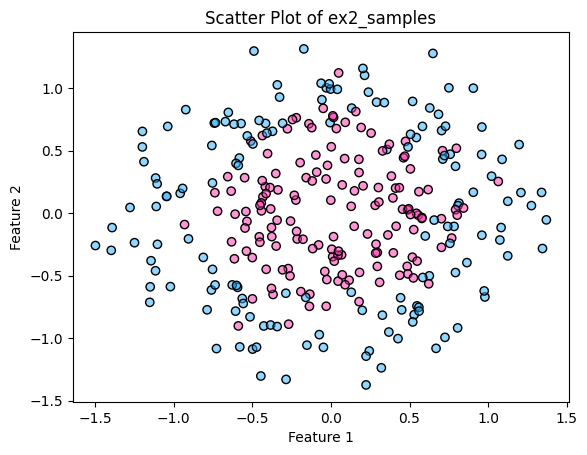

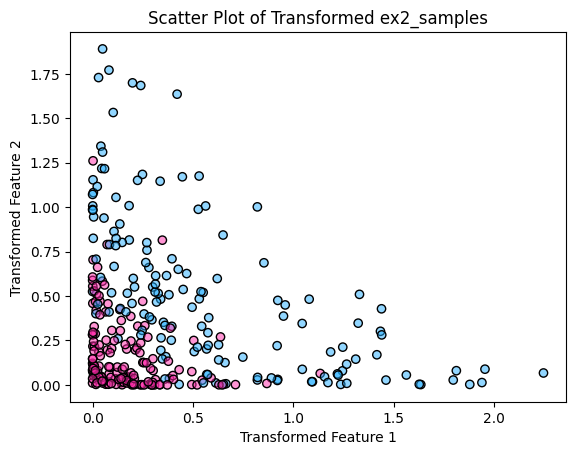

In [26]:
# Load the data
ex2_samples = np.load('ex2_samples.npy')
ex2_labels = np.load('ex2_labels.npy')

# Visualize the data
plt.scatter(ex2_samples[:, 0], ex2_samples[:, 1], c=ex2_labels, cmap=custom_cmap, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of ex2_samples')
plt.show()

# Transform the data
def transform_data(samples):
    transformed = np.empty_like(samples)
    transformed[:, 0] = samples[:, 0] ** 2
    transformed[:, 1] = samples[:, 1] ** 2
    return transformed

transformed_samples = transform_data(ex2_samples)

# Visualize the transformed data
plt.scatter(transformed_samples[:, 0], transformed_samples[:, 1], c=ex2_labels, cmap=custom_cmap, edgecolor='k')
plt.xlabel('Transformed Feature 1')
plt.ylabel('Transformed Feature 2')
plt.title('Scatter Plot of Transformed ex2_samples')
plt.show()


b) (10%) Fitten Sie einen KNeighborsClassifier für verschiedene Werte von "k" auf den Trainingsdaten und berechnen Sie Accuracy für die Trainings- und Testdaten. Erstellen Sie einen Plot für "k" vs "Accuracy" für Trainings- und Test-Accuracy

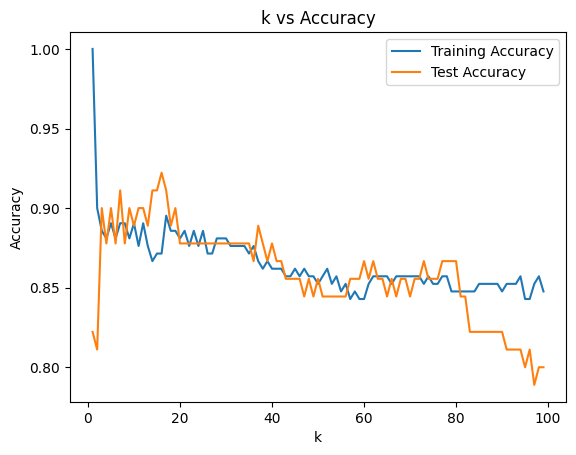

In [28]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_samples, ex2_labels, test_size=0.3, random_state=42)

k_values = range(1, 100)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()


c) (30%) Splitten Sie Ihre Trainingsdaten in verschiedene Trainings- und Validationsets und führen Sie CrossValidation durch, um den besten Wert für "k" zu finden. 

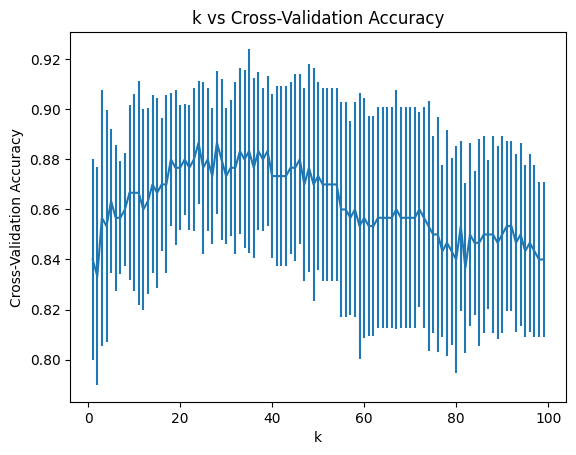

Best k: 24


In [36]:
from sklearn.model_selection import cross_val_score

cv_accuracies = []
cv_std = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, transformed_samples, ex2_labels, cv=5)
    cv_accuracies.append(scores.mean())
    cv_std.append(scores.std())

plt.errorbar(k_values, cv_accuracies, yerr=cv_std, label='Cross-Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k vs Cross-Validation Accuracy')
plt.show()

best_k = k_values[np.argmax(cv_accuracies)]
print(f'Best k: {best_k}')


d) (5%) Plotten Sie "k" vs "CrossValidation Accuracy" mit den zugehörigen Fehlerbalken. Stimmt ihr so ermittelter Wert für "k" mit dem zuvor bestimmten besten Wert für "k" an den Testdaten überein?

Best k from Test Data: 16


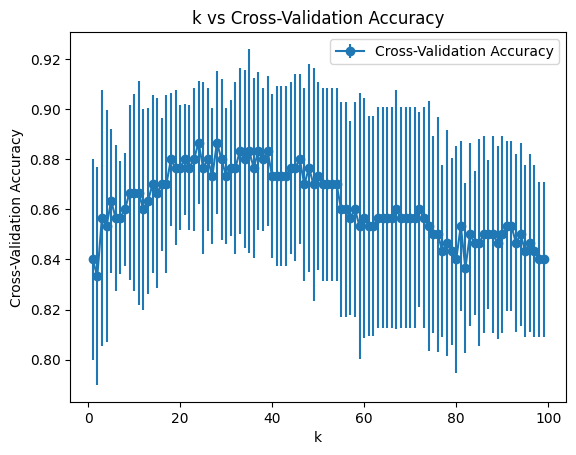

Best k from Cross-Validation: 24
The best k value from cross-validation (24) does not match the best k value from the test data (16).


In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the data
ex2_samples = np.load('ex2_samples.npy')
ex2_labels = np.load('ex2_labels.npy')

# Custom color map
custom_cmap = ListedColormap(['#FF0000', '#0000FF'])



# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_samples, ex2_labels, test_size=0.3, random_state=42)

# Determine the best k value from test data
best_k_test = k_values[np.argmax(test_accuracies)]
print(f'Best k from Test Data: {best_k_test}')



# Part d: Plot cross-validation accuracy with error bars
plt.errorbar(k_values, cv_accuracies, yerr=cv_std, label='Cross-Validation Accuracy', fmt='-o')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k vs Cross-Validation Accuracy')
plt.legend()
plt.show()

# Print the best k value from cross-validation
best_k_cv = k_values[np.argmax(cv_accuracies)]
print(f'Best k from Cross-Validation: {best_k_cv}')

# Compare the best k values
if best_k_cv == best_k_test:
    print(f'The best k value from cross-validation ({best_k_cv}) matches the best k value from the test data ({best_k_test}).')
else:
    print(f'The best k value from cross-validation ({best_k_cv}) does not match the best k value from the test data ({best_k_test}).')


---

In [30]:
# Load the test data
samples_test = np.load('samples_test.npy')
labels_test = np.load('labels_test.npy')
transformed_samples_test = transform_data(samples_test)

test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(transformed_samples, ex2_labels)
    test_score = knn.score(transformed_samples_test, labels_test)
    test_accuracies.append(test_score)

# Determine the best k value from test data
best_k_test = k_values[np.argmax(test_accuracies)]
print(f'Best k from Test Data: {best_k_test}')


Best k from Test Data: 1
